 # Imports and Dependencies

In [1]:
import io
import numpy as np
import pandas as pd
import plotly.express as px
import pymongo
import tqdm.auto as tqdm

spike_range = namedtuple("spike_range", ["min","max"])

# Connect to Mongo

In [2]:
mongo = pymongo.MongoClient("")['fingerprints']['training']

In [3]:
mongo = mongo['fingerprints']['training']

In [42]:
Image.frombytes("RGB",size=(1024,1024),data=p.to_image(width=1024, height=1024))

ValueError: not enough image data

## Defining our parameters:
    Action Space: The list of actions that the agent takes to modify the enviroment.
    State Space: The current filtered tensor torch.FloatTensor(df[[col for col in df.columns if col.startswith("spike")]].to_numpy())
    For state space, I think we should go stateless since ideally the state returned by the DQN should continually shrink


In [30]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
class DeepQNetwork(nn.Module):
    def __init__(self, ALPHA):
        super(DeepQNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 8, stride=4, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(128*19*8, 512)
        self.fc2 = nn.Linear(512,6)
        
        self.optimizer = optim.RMSprop(self.parameters(), lr=ALPHA)
        self.loss = nn.MSELoss()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        
    def forward(self, observation):
        observation = T.Tensor

ValueError: not enough image data

# Environment

In [697]:
class FingerprintEnv(object):
    def __init__(self, df):
        super(FingerprintEnv, self).__init__()
        self.total_df = df
        self.df = self.nextBatch()
        self.filtered_df = self.df.copy()
        self.currentState = self.imgState()
        self.stateSpace = [0]
        self.filter = {
            'spike0': spike_range(min=df['spike0'].min(), max=df['spike0'].max()),
            'spike1': spike_range(min=df['spike1'].min(), max=df['spike1'].max()),
            'spike2': spike_range(min=df['spike2'].min(), max=df['spike2'].max()),
            'spike3': spike_range(min=df['spike3'].min(), max=df['spike3'].max()),
            'spike4': spike_range(min=df['spike4'].min(), max=df['spike4'].max()),
            'spike5': spike_range(min=df['spike5'].min(), max=df['spike5'].max()),
            'spike6': spike_range(min=df['spike6'].min(), max=df['spike6'].max()),
            'spike7': spike_range(min=df['spike7'].min(), max=df['spike7'].max()),
            'spike8': spike_range(min=df['spike8'].min(), max=df['spike8'].max())
        }
        self.actionSpace = {
            "spike0-maxUP" : self.increment_max,
            "spike0-maxDOWN" : self.decrement_max,
            "spike0-minUP" : self.increment_min,
            "spike0-minDOWN" : self.decrement_min,
            "spike1-maxUP" : self.increment_max,
            "spike1-maxDOWN" : self.decrement_max,
            "spike1-minUP" : self.increment_min,
            "spike1-minDOWN" : self.decrement_min,
            "spike2-maxUP" : self.increment_max,
            "spike2-maxDOWN" : self.decrement_max,
            "spike2-minUP" : self.increment_min,
            "spike2-minDOWN" : self.decrement_min,
            "spike3-maxUP" : self.increment_max,
            "spike3-maxDOWN" : self.decrement_max,
            "spike3-minUP" : self.increment_min,
            "spike3-minDOWN" : self.decrement_min,
            "spike4-maxUP" : self.increment_max,
            "spike4-maxDOWN" : self.decrement_max,
            "spike4-minUP" : self.increment_min,
            "spike4-minDOWN" : self.decrement_min,
            "spike5-maxUP" : self.increment_max,
            "spike5-maxDOWN" : self.decrement_max,
            "spike5-minUP" : self.increment_min,
            "spike5-minDOWN" : self.decrement_min,
            "spike6-maxUP" : self.increment_max,
            "spike6-maxDOWN" : self.decrement_max,
            "spike6-minUP" : self.increment_min,
            "spike6-minDOWN" : self.decrement_min,
            "spike7-maxUP" : self.increment_max,
            "spike7-maxDOWN" : self.decrement_max,
            "spike7-minUP" : self.increment_min,
            "spike7-minDOWN" : self.decrement_min,
            "spike8-maxUP" : self.increment_max,
            "spike8-maxDOWN" : self.decrement_max,
            "spike8-minUP" : self.increment_min,
            "spike8-minDOWN" : self.decrement_min,
            "noaction" : None
        }
        self.possibleActions = list(self.actionSpace.keys())
    def nextBatch(self):
        sample = pd.Series(self.total_df.moniker.unique()).sample(10).unique().tolist()
        df = self.total_df[self.total_df['moniker'].isin(sample)]
        for key, val in df.moniker.value_counts().items():
            if val < 5:
                df = df[df['moniker']!=key]
        return df
    
    def increment_max(self, spike):
        spikeVal = self.filter[spike]
        self.filter[spike] = spike_range(spikeVal[0], spikeVal[1] + .5)
        return
    
    def decrement_max(self, spike):
        spikeVal = self.filter[spike]
        if spikeVal[1]-.5 >= spikeVal[0]:
            self.filter[spike] = spike_range(spikeVal[0], spikeVal[1] - .5)
        return
    
    def increment_min(self, spike):
        spikeVal = self.filter[spike]
        if spikeVal[0]+.5 <= spikeVal[1]:
            self.filter[spike] = spike_range(spikeVal[0] + .5, spikeVal[1])
        return
    
    def decrement_min(self, spike):
        spikeVal = self.filter[spike]
        self.filter[spike] = spike_range(spikeVal[0] - .5, spikeVal[1])
        return
    
    def apply_filters(self):
        self.filtered_df = self.df.copy()
        for key,value in self.filter.items():
            self.filtered_df = self.filtered_df[self.filtered_df[key].between(value[0], value[1])]
        return
    
    def imgState(self):
        img = Image.open(
            io.BytesIO(
                px.parallel_coordinates(
                    self.filtered_df[[col for col in self.filtered_df.columns if col.startswith("spike")]],
                    height = 256,
                    width = 256, 
                ).to_image(width=384, height=384)
            )
        )
        img = transforms.functional.crop(img, top=60, left=60, height=324, width=324)
        img = transforms.functional.rotate(img, 180)
        img = transforms.functional.crop(img, top=68, left=68, height=256, width=256)
        img = transforms.functional.rotate(img, 180)
        img = transforms.functional.to_tensor(img)
        img = transforms.functional.rgb_to_grayscale(img[:3], 1)
        return img
    
    def get_reward(self, action):
        monikers = self.filtered_df.moniker.unique().tolist()
        total_possible = self.df[self.df.moniker.isin(monikers)].shape[0] # Grab the number of records for all monikers in total
        current_total = self.filtered_df[self.filtered_df.moniker.isin(monikers)].shape[0] # Grab the number of records for all monikers within current filter
        num_monikers = len(monikers)
        if num_monikers == 0:
            num_monikers = 10000
        return (current_total/(num_monikers) - total_possible)
    
    def step(self, action):
        ## Take the action
        if action != "noaction":
            self.actionSpace[action](action.split("-")[0])
            
        ## Filter the data
        self.apply_filters()
        self.currentState = self.imgState()
        reward = self.get_reward(action)
        return self.currentState, reward, reward==0, None
    
    def reset(self):
        self.df = self.nextBatch()
        self.filtered_df = self.df.copy()
        self.filter = {
            'spike0': spike_range(min=self.df['spike0'].min(), max=self.df['spike0'].max()),
            'spike1': spike_range(min=self.df['spike1'].min(), max=self.df['spike1'].max()),
            'spike2': spike_range(min=self.df['spike2'].min(), max=self.df['spike2'].max()),
            'spike3': spike_range(min=self.df['spike3'].min(), max=self.df['spike3'].max()),
            'spike4': spike_range(min=self.df['spike4'].min(), max=self.df['spike4'].max()),
            'spike5': spike_range(min=self.df['spike5'].min(), max=self.df['spike5'].max()),
            'spike6': spike_range(min=self.df['spike6'].min(), max=self.df['spike6'].max()),
            'spike7': spike_range(min=self.df['spike7'].min(), max=self.df['spike7'].max()),
            'spike8': spike_range(min=self.df['spike8'].min(), max=self.df['spike8'].max())
        }
        self.currentState = self.imgState()
        return self.currentState
    
    def render(self):
        img = transforms.functional.to_pil_image(self.currentState)
        display(img)
        # fig,ax = plt.subplots(figsize=(28,28))
        # ax.imshow(img)
        # plt.show()
        return

# DQN

In [698]:
class DeepQNetwork(nn.Module):
    def __init__(self, ALPHA):
        super(DeepQNetwork, self).__init__()
        #self.conv1 = nn.Conv2d(3, 32, 8, stride=4, padding=1)
        self.conv1 = nn.Conv2d(1, 32, 8, stride=4, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = nn.Conv2d(64, 128, 3)
        #self.fc1 = nn.Linear(128*23*16, 512)
        self.fc1 = nn.LazyLinear(512)
        self.fc2 = nn.Linear(512, 37)
        #self.optimizer = optim.SGD(self.parameters(), lr=self.ALPHA, momentum=0.9)
        self.optimizer = optim.RMSprop(self.parameters(), lr=ALPHA)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, observation):
        observation = T.Tensor(observation).to(self.device)
        #observation = observation.view(-1, 3, 210, 160).to(self.device)
        observation = observation.view(-1, 1, 256, 256)
        observation = F.relu(self.conv1(observation))
        observation = F.relu(self.conv2(observation))
        observation = F.relu(self.conv3(observation))
        #observation = observation.view(-1, 128*23*16).to(self.device)
        observation = observation.view(-1, 128*28*28)
        observation = F.relu(self.fc1(observation))
        actions = self.fc2(observation)
        return actions

# Agent

In [699]:
class Agent(object):
    def __init__(self, gamma, epsilon, alpha,
                 maxMemorySize, epsEnd=0.05,
                 replace=10000, actionSpace=[0,1,2,3,4,5]):
        self.GAMMA = gamma
        self.EPSILON = epsilon
        self.EPS_END = epsEnd
        self.ALPHA = alpha
        self.actionSpace = actionSpace
        self.memSize = maxMemorySize
        self.steps = 0
        self.learn_step_counter = 0
        self.memory = []
        self.memCntr = 0
        self.replace_target_cnt = replace
        self.Q_eval = DeepQNetwork(alpha)
        self.Q_next = DeepQNetwork(alpha)

    def storeTransition(self, state, action, reward, state_):
        if self.memCntr < self.memSize:
            self.memory.append([state, action, reward, state_])
        else:
            self.memory[self.memCntr%self.memSize] = [state, action, reward, state_]
        self.memCntr += 1

    def chooseAction(self, observation):
        rand = np.random.random()
        actions = self.Q_eval.forward(observation)
        if rand < 1 - self.EPSILON:
            action = T.argmax(actions[1]).item()
        else:
            action = np.random.choice(self.actionSpace)
        self.steps += 1
        return action

    def learn(self, batch_size):
        self.Q_eval.optimizer.zero_grad()
        if self.replace_target_cnt is not None and \
           self.learn_step_counter % self.replace_target_cnt == 0:
            self.Q_next.load_state_dict(self.Q_eval.state_dict())

        if self.memCntr+batch_size < self.memSize:
            memStart = int(np.random.choice(range(self.memCntr)))
        else:
            memStart = int(np.random.choice(range(self.memSize-batch_size-1)))
        miniBatch=self.memory[memStart:memStart+batch_size]
        memory = np.array(miniBatch, dtype=object)

        # convert to list because memory is an array of numpy objects
        Qpred = self.Q_eval.forward(torch.stack(memory[:,0][:].tolist())).to(self.Q_eval.device)
        Qnext = self.Q_next.forward(torch.stack(memory[:,3][:].tolist())).to(self.Q_eval.device)

        maxA = T.argmax(Qnext, dim=1).to(self.Q_eval.device)
        rewards = T.Tensor(list(memory[:,2])).to(self.Q_eval.device)
        Qtarget = Qpred.clone()
        indices = np.arange(batch_size)
        Qtarget[indices,maxA] = rewards + self.GAMMA*T.max(Qnext[1])

        if self.steps > 500:
            if self.EPSILON - 1e-4 > self.EPS_END:
                self.EPSILON -= 1e-4
            else:
                self.EPSILON = self.EPS_END

        #Qpred.requires_grad_()
        loss = self.Q_eval.loss(Qtarget, Qpred).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()
        self.learn_step_counter += 1


# Train the model

In [700]:
## Query the data from Mongo
# df = pd.DataFrame(mongo.find({}))
df.shape

(4185026, 11)

In [701]:
# save = brain.memory

In [702]:
env = FingerprintEnv(df)
brain = Agent(gamma=0.95, epsilon=1.0, alpha=0.003, maxMemorySize=5000, replace=None, actionSpace=env.possibleActions)
bar = tqdm.tqdm(desc="Memory Filler", total=5000)
# while brain.memCntr < brain.memSize:
#     observation = env.reset()
#     done = False
#     while not done:
#         action = np.random.choice(env.possibleActions)
#         observation_, reward, done, info = env.step(action)
#         brain.storeTransition(observation, action, reward, observation_)
#         observation = observation_
#         bar.update()
print('done initializing memory')

Memory Filler:   0%|          | 0/5000 [00:00<?, ?it/s]

done initializing memory


In [703]:
brain.memory = save[:5000]

In [704]:
import warnings
warnings.filterwarnings("ignore")

Training:   0%|          | 0/50 [00:00<?, ?it/s]

Finding fp-1. Epsilon: 1.0


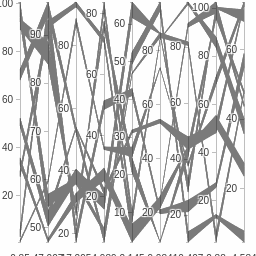

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [707]:
scores = []
epsHistory = []
numGames = 50
batch_size=32
# uncomment the line below to record every episode.
# env = wrappers.Monitor(env, "tmp/space-invaders-1", video_callable=lambda episode_id: True, force=True)
bar = tqdm.tqdm(desc="Training", total=numGames)
for i in range(numGames):

    print(f"Finding fp-{i+1}. Epsilon: {brain.EPSILON}")
    env.render()
    epsHistory.append(brain.EPSILON)
    done = False
    observation = env.reset()
    score = 0
    lastAction = 0
    while not done:
        # print(observation)
        action = brain.chooseAction(observation)
        # print(action)
        observation_, reward, done, info = env.step(action)
        # display(transforms.functional.to_pil_image(observation_))
        # print(reward)
        # print(done)
        score += reward
        # print(score)
        brain.storeTransition(observation, action, reward, observation_)
        # print("Stored")
        observation = observation_
        brain.learn(batch_size)
        lastAction = action
    bar.update()
    env.render()
    scores.append(score)
    print(f'score: {score}')
plt.plot(scores)
plt.show()